## Import dependencies

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Kaggle/House Prices: Advanced Regression Techniques"

 data_description.txt  'House Prices.ipynb'   sample_submission.csv   test.csv
 future_encoders.py     __pycache__	      submission.csv	      train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [0]:
pd.options.mode.chained_assignment = None 

### Import data

In [6]:
data = pd.read_csv('/content/drive/My Drive/Kaggle/House Prices: Advanced Regression Techniques/train.csv')
submission_data = pd.read_csv('/content/drive/My Drive/Kaggle/House Prices: Advanced Regression Techniques/test.csv')
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
submission_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Drop Id

In [0]:
data = data.drop('Id', axis = 1)
submission_data = submission_data.drop('Id', axis = 1)

# Data overview

In [0]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

### Check the NA's

In [10]:
data.isnull().any()[data.isnull().any() == True]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [11]:
total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## Train-Test split

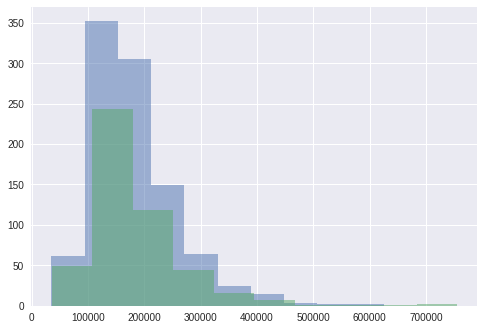

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

### Filling NA with None where accepted

In [0]:
for col in ('PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu','GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond'):
  X_train[col] =  X_train[col].fillna('None')
    
for col in ('PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu','GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond'):
  X_train[col] =  X_train[col].fillna('None')
  
for col in ('PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu','GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond'):
  X[col] =  X[col].fillna('None')
  
for col in ('PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu','GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond'):
  submission_data[col] =  submission_data[col].fillna('None')

### Filling NA with 0 where accepted

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MasVnrArea'):
    X_train[col] = X_train[col].fillna(0)
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MasVnrArea'):
    X_test[col] = X_test[col].fillna(0)
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MasVnrArea'):
    X[col] = X[col].fillna(0)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MasVnrArea'):
    submission_data[col] = submission_data[col].fillna(0)

### Other imputations

In [0]:
X_train["Functional"] = X_train["Functional"].fillna("Typ")

X_test["Functional"] = X_test["Functional"].fillna("Typ")

X["Functional"] = X["Functional"].fillna("Typ")

submission_data["Functional"] = submission_data["Functional"].fillna("Typ")

In [0]:
X_train['MSZoning'] = X_train['MSZoning'].fillna(X_train['MSZoning'].mode()[0])

X_test['MSZoning'] = X_test['MSZoning'].fillna(X_test['MSZoning'].mode()[0])

X['MSZoning'] = X['MSZoning'].fillna(X['MSZoning'].mode()[0])

submission_data['MSZoning'] = submission_data['MSZoning'].fillna(submission_data['MSZoning'].mode()[0])

In [0]:
X_train['Electrical'] = X_train['Electrical'].fillna(X_train['Electrical'].mode()[0])

X_test['Electrical'] = X_test['Electrical'].fillna(X_test['Electrical'].mode()[0])

X['Electrical'] = X['Electrical'].fillna(X['Electrical'].mode()[0])

submission_data['Electrical'] = submission_data['Electrical'].fillna(submission_data['Electrical'].mode()[0])

In [0]:
X_train["LotFrontage"] = X_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

X_test["LotFrontage"] = X_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

X["LotFrontage"] = X.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

submission_data["LotFrontage"] = submission_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:
X_train = X_train.drop('Utilities', axis = 1)

X_test = X_test.drop('Utilities', axis = 1)

X = X.drop('Utilities', axis = 1)

submission_data = submission_data.drop('Utilities', axis = 1)

In [0]:
#MSSubClass=The building class
X_train['MSSubClass'] = X_train['MSSubClass'].apply(str)

X_test['MSSubClass'] = X_test['MSSubClass'].apply(str)

X['MSSubClass'] = X['MSSubClass'].apply(str)

submission_data['MSSubClass'] = submission_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
X_train['OverallCond'] = X_train['OverallCond'].astype(str)

X_test['OverallCond'] = X_test['OverallCond'].astype(str)

X['OverallCond'] = X['OverallCond'].astype(str)

submission_data['OverallCond'] = submission_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
X_train['YrSold'] = X_train['YrSold'].astype(str)
X_train['MoSold'] = X_train['MoSold'].astype(str)

X_test['YrSold'] = X_test['YrSold'].astype(str)
X_test['MoSold'] = X_test['MoSold'].astype(str)

X['YrSold'] = X['YrSold'].astype(str)
X['MoSold'] = X['MoSold'].astype(str)

submission_data['YrSold'] = submission_data['YrSold'].astype(str)
submission_data['MoSold'] = submission_data['MoSold'].astype(str)

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X_train[c].values)) 
    X_train[c] = lbl.transform(list(X_train[c].values))
    
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X_test[c].values)) 
    X_test[c] = lbl.transform(list(X_test[c].values))
    
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X[c].values)) 
    X[c] = lbl.transform(list(X[c].values))
    
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(submission_data[c].values)) 
    submission_data[c] = lbl.transform(list(submission_data[c].values))

## Dummy variables

In [0]:
X_train = pd.get_dummies(X_train)

X_test = pd.get_dummies(X_test)

X = pd.get_dummies(X)

submission_data = pd.get_dummies(submission_data)

In [0]:
# Get missing columns in the training test
missing_cols_test = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols_test:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [0]:
# Get missing columns in the training test
missing_cols_train = set( X_test.columns ) - set( X_train.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols_train:
    X_train[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_train = X_train[X_test.columns]

In [0]:
# Get missing columns in the training test
missing_cols_submission_data = set( X.columns ) - set( submission_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols_submission_data:
    submission_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
submission_data = submission_data[X.columns]


In [26]:
X.shape[1] == submission_data.shape[1]

True

## Stratified K-fold

In [0]:
from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=17)

## Models

In [0]:
from sklearn.linear_model import Ridge
param_grid_1 = {'alpha':  [20],
              'tol': [10 ** -5]}

grid_1 = GridSearchCV(Ridge(), param_grid_1, cv=kfold, scoring='neg_mean_squared_log_error',
                      return_train_score=True, n_jobs = -1, iid = True)

In [29]:
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
metrics.mean_squared_log_error(y_test, grid_1.best_estimator_.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'alpha': 20, 'tol': 1e-05}


0.030541218873838198

In [30]:
0.0311895689214515

0.0311895689214515

In [31]:
from sklearn.linear_model import Lasso
param_grid_2 = {'alpha':  [1, 5, 8,10, 15, 20, 30, 40, 50], #30
                'tol': [10 ** -9 ,10 ** -8,10 ** -7 ,10 ** -6, 0.00001, 0.0001, 0.001, 0.01]} # 10 ** -9

grid_2 = GridSearchCV(Lasso(), param_grid_2, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1, 5, 8, 10, 15, 20, 30, 40, 50], 'tol': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [32]:
print(grid_2.best_params_)
metrics.mean_squared_log_error(y_test, grid_2.best_estimator_.predict(X_test))

{'alpha': 30, 'tol': 1e-09}


0.02335231836205075

In [33]:
0.023352318362050744

0.023352318362050744

In [36]:
from sklearn.svm import LinearSVR
param_grid_3 = {'C':  [ 0.073, 0.075, 0.079, 0.08, 0.081, 0.083, 0.085,0.09, 0.1, 0.2, 0.3]} # 0.85

grid_3 = GridSearchCV(LinearSVR(), param_grid_3, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.073, 0.075, 0.079, 0.08, 0.081, 0.083, 0.085, 0.09, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.073, 0.075, 0.079, 0.08, 0.081, 0.083, 0.085, 0.09, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [37]:
print(grid_3.best_params_)
metrics.mean_squared_log_error(np.abs(y_test), grid_3.best_estimator_.predict(X_test))

{'C': 0.081}


0.10270416013960987

In [38]:
0.043261704006088926

0.043261704006088926

In [39]:
from sklearn.svm import SVR
param_grid_4 = {'C':  [  5* 10 ** 6, 10 ** 7, 5 * 10 ** 7], # 10 ** 7
                'gamma': [10 ** -8, 3 * 10 ** -8, 8 * 10**-8 ] #3 * 10 ** -8
               }

grid_4 = GridSearchCV(SVR(), param_grid_4, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_4.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [5000000, 10000000, 50000000], 'gamma': [1e-08, 3.0000000000000004e-08, 8e-08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [40]:
print(grid_4.best_params_)
metrics.mean_squared_log_error(np.abs(y_test), grid_4.best_estimator_.predict(X_test))

{'C': 10000000, 'gamma': 3.0000000000000004e-08}


0.03464417601429759

In [41]:
0.03464324286397382

0.03464324286397382

In [42]:
from sklearn.neighbors import KNeighborsRegressor
param_grid_5 = {'n_neighbors': [2, 3, 4, 5, 10, 11,12, 13, 14, 15, 16], # 3
                'metric': ['euclidean', 'minkowski','cityblock', 'cosine'] # cityblock
               }

grid_5 = GridSearchCV(KNeighborsRegressor(), param_grid_5, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_5.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16], 'metric': ['euclidean', 'minkowski', 'cityblock', 'cosine']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
print(grid_5.best_params_)
metrics.mean_squared_log_error(np.abs(y_test), grid_5.best_estimator_.predict(X_test))

{'metric': 'cityblock', 'n_neighbors': 3}


0.04514081251780706

In [44]:
0.045149290129063414

0.045149290129063414

In [45]:
from sklearn.ensemble import RandomForestRegressor
param_grid_6 = {'n_estimators': [42,43,44], #43
                 'max_leaf_nodes': [25,26,27], #26
                'max_depth': [6,7,8], #7
                'min_samples_split': [2,3,4] #3
               }

grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid_6, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_6.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [42, 43, 44], 'max_leaf_nodes': [25, 26, 27], 'max_depth': [6, 7, 8], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [46]:
print(grid_6.best_params_)
metrics.mean_squared_log_error(np.abs(y_test), grid_6.best_estimator_.predict(X_test))

{'max_depth': 7, 'max_leaf_nodes': 27, 'min_samples_split': 4, 'n_estimators': 43}


0.028932951968136653

In [47]:
0.02851010693749113

0.02851010693749113

In [48]:
from xgboost import XGBRegressor
param_grid_7 = {'n_estimators': [200, 300, 400], #200
                'learning_rate': [0.1,0.2,0.3], #0.2
                'max_depth': [6,7,8], #8
                'min_child_weight': [2,3,4] #3     
               }

grid_7 = GridSearchCV(XGBRegressor(), param_grid_7, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_7.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 300, 400], 'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [6, 7, 8], 'min_child_weight': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [49]:
print(grid_7.best_params_)
metrics.mean_squared_log_error(np.abs(y_test), grid_7.best_estimator_.predict(X_test))

{'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 400}


0.020592300917541804

In [50]:
0.020480473018611344

0.020480473018611344

In [51]:
from sklearn.linear_model import ElasticNet
param_grid_8 = {'l1_ratio': [0.1,0.2,0.5,0.7,0.9,1],
                'tol': [10 ** -7 ,10 ** -6, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                'alpha':[1, 5, 8,10, 15, 20, 30, 40, 50]
               }
grid_8 = GridSearchCV(ElasticNet(), param_grid_8, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_8.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'l1_ratio': [0.1, 0.2, 0.5, 0.7, 0.9, 1], 'tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'alpha': [1, 5, 8, 10, 15, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [52]:
print(grid_8.best_params_)
metrics.mean_squared_log_error(np.abs(y_test), grid_8.best_estimator_.predict(X_test))

{'alpha': 30, 'l1_ratio': 1, 'tol': 1e-07}


0.02335231836205075

In [53]:
models = []
models.append(('Ridge', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('LinearSVR', grid_3.best_estimator_))
models.append(('Rbf SVR', grid_4.best_estimator_))
models.append(('KNN', grid_5.best_estimator_))
models.append(('RF', grid_6.best_estimator_))
models.append(('XGB', grid_7.best_estimator_))
models.append(('ENet', grid_8.best_estimator_))

mean_absolute_error = []
mean_squared_error = []
mean_squared_log_error = []
for name, model in models:
    print(name)
    print("mean_absolute_error: {}".format(metrics.mean_absolute_error(y_test , model.predict(X_test)) ))
    print("mean_squared_error: {}".format( metrics.mean_squared_error(y_test , model.predict(X_test)) ))
    print("mean_squared_log_error: {}".format( metrics.mean_squared_log_error(y_test , model.predict(X_test)) ))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test , model.predict(X_test)))
    mean_squared_error.append( metrics.mean_squared_error(y_test , model.predict(X_test)))
    mean_squared_log_error.append(metrics.mean_squared_log_error(np.abs(y_test) , model.predict(X_test)))

Ridge
mean_absolute_error: 20437.522476313185
mean_squared_error: 1261728697.6899395
mean_squared_log_error: 0.030541218873838198
Lasso
mean_absolute_error: 18444.20346584119
mean_squared_error: 929298464.2434222
mean_squared_log_error: 0.02335231836205075
LinearSVR
mean_absolute_error: 27436.204617633928
mean_squared_error: 1877771263.6818576
mean_squared_log_error: 0.10270416013960987
Rbf SVR
mean_absolute_error: 22066.378495143577
mean_squared_error: 1305979899.2888477
mean_squared_log_error: 0.03464417601429759
KNN
mean_absolute_error: 26713.15560165975
mean_squared_error: 2074092938.8573072
mean_squared_log_error: 0.04514081251780706
RF
mean_absolute_error: 20938.48193749723
mean_squared_error: 1243956201.445234
mean_squared_log_error: 0.028932951968136646
XGB
mean_absolute_error: 17854.542595954357
mean_squared_error: 948320363.036174
mean_squared_log_error: 0.020592300917541804
ENet
mean_absolute_error: 18444.20346584119
mean_squared_error: 929298464.2434222
mean_squared_log_err

In [54]:
d = {'mean_absolute_error': mean_absolute_error, 
     'mean_squared_error': mean_squared_error, 
     'mean_squared_log_error': mean_squared_log_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Ridge', 'Lasso', 'LinearSVR', 'Rbf SVR', 'KNN', 
                                         'RF', 'XGB', 'ENet'])
df

,Method,mean_absolute_error,mean_squared_error,mean_squared_log_error
0,Ridge,20437.522476,1.261729e+09,0.030541
1,Lasso,18444.203466,9.292985e+08,0.023352
2,LinearSVR,27436.204618,1.877771e+09,0.102704
3,Rbf SVR,22066.378495,1.305980e+09,0.034644
4,KNN,26713.155602,2.074093e+09,0.045141
5,RF,20938.481937,1.243956e+09,0.028933
6,XGB,17854.542596,9.483204e+08,0.020592
7,ENet,18444.203466,9.292985e+08,0.023352


# Keras

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [56]:
y_train

615     137500
613     147000
1303    232000
486     156000
561     170000
308      82500
461     155000
1142    424870
730     236500
1155    218000
1203    213000
700     312500
849     187000
1260    181000
787     233000
352      95000
710      52000
124     181000
178     501837
287      88000
1407    112000
1208    140000
294     167000
327     145250
1456    210000
841     157500
1121    212900
931     117500
236     185500
88       85000
         ...  
747     265979
252     173000
21      139400
1337     52500
459     110000
1184    186700
276     201000
955     145000
1215    125000
385     192000
805     227680
1437    394617
343     266000
769     538000
1332    100000
130     226000
871     200500
1123    118000
1396    160000
87      164500
330     119000
1238    142500
466     167000
121     100000
1044    278000
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 978, dtype: int64

In [57]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dropout(0.35))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(1))

early_stopping = EarlyStopping(patience = 10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
model.fit(X_train, pd.get_y_train, 
          batch_size = 32, 
          validation_split = 0.3, 
          epochs = 200, 
          callbacks=[early_stopping])

AttributeError: ignored

In [0]:
metrics.mean_squared_log_error(np.abs(y_test), model.predict(X_test))

In [0]:
0.04354357921352337

# Final model

In [0]:
param_final = {'n_estimators': [200], #200
                'learning_rate': [0.2], #0.2
                'max_depth': [8], #8
                'min_child_weight': [3] #3     
               }

grid_final = GridSearchCV(XGBRegressor(), param_final, cv=kfold, scoring='neg_mean_squared_error',
                      return_train_score=True, n_jobs = -1, iid = True)

grid_final.fit(X, y)

In [0]:
sample = pd.read_csv("/content/drive/My Drive/Kaggle/House Prices: Advanced Regression Techniques/sample_submission.csv")

In [0]:
sample.iloc[:,1] = grid_final.best_estimator_.predict(submission_data)

In [0]:
sample.to_csv('/content/drive/My Drive/Kaggle/House Prices: Advanced Regression Techniques/submission.csv')